In [57]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import watermark
import seaborn as sns

In [58]:
taxis = sns.load_dataset("taxis")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


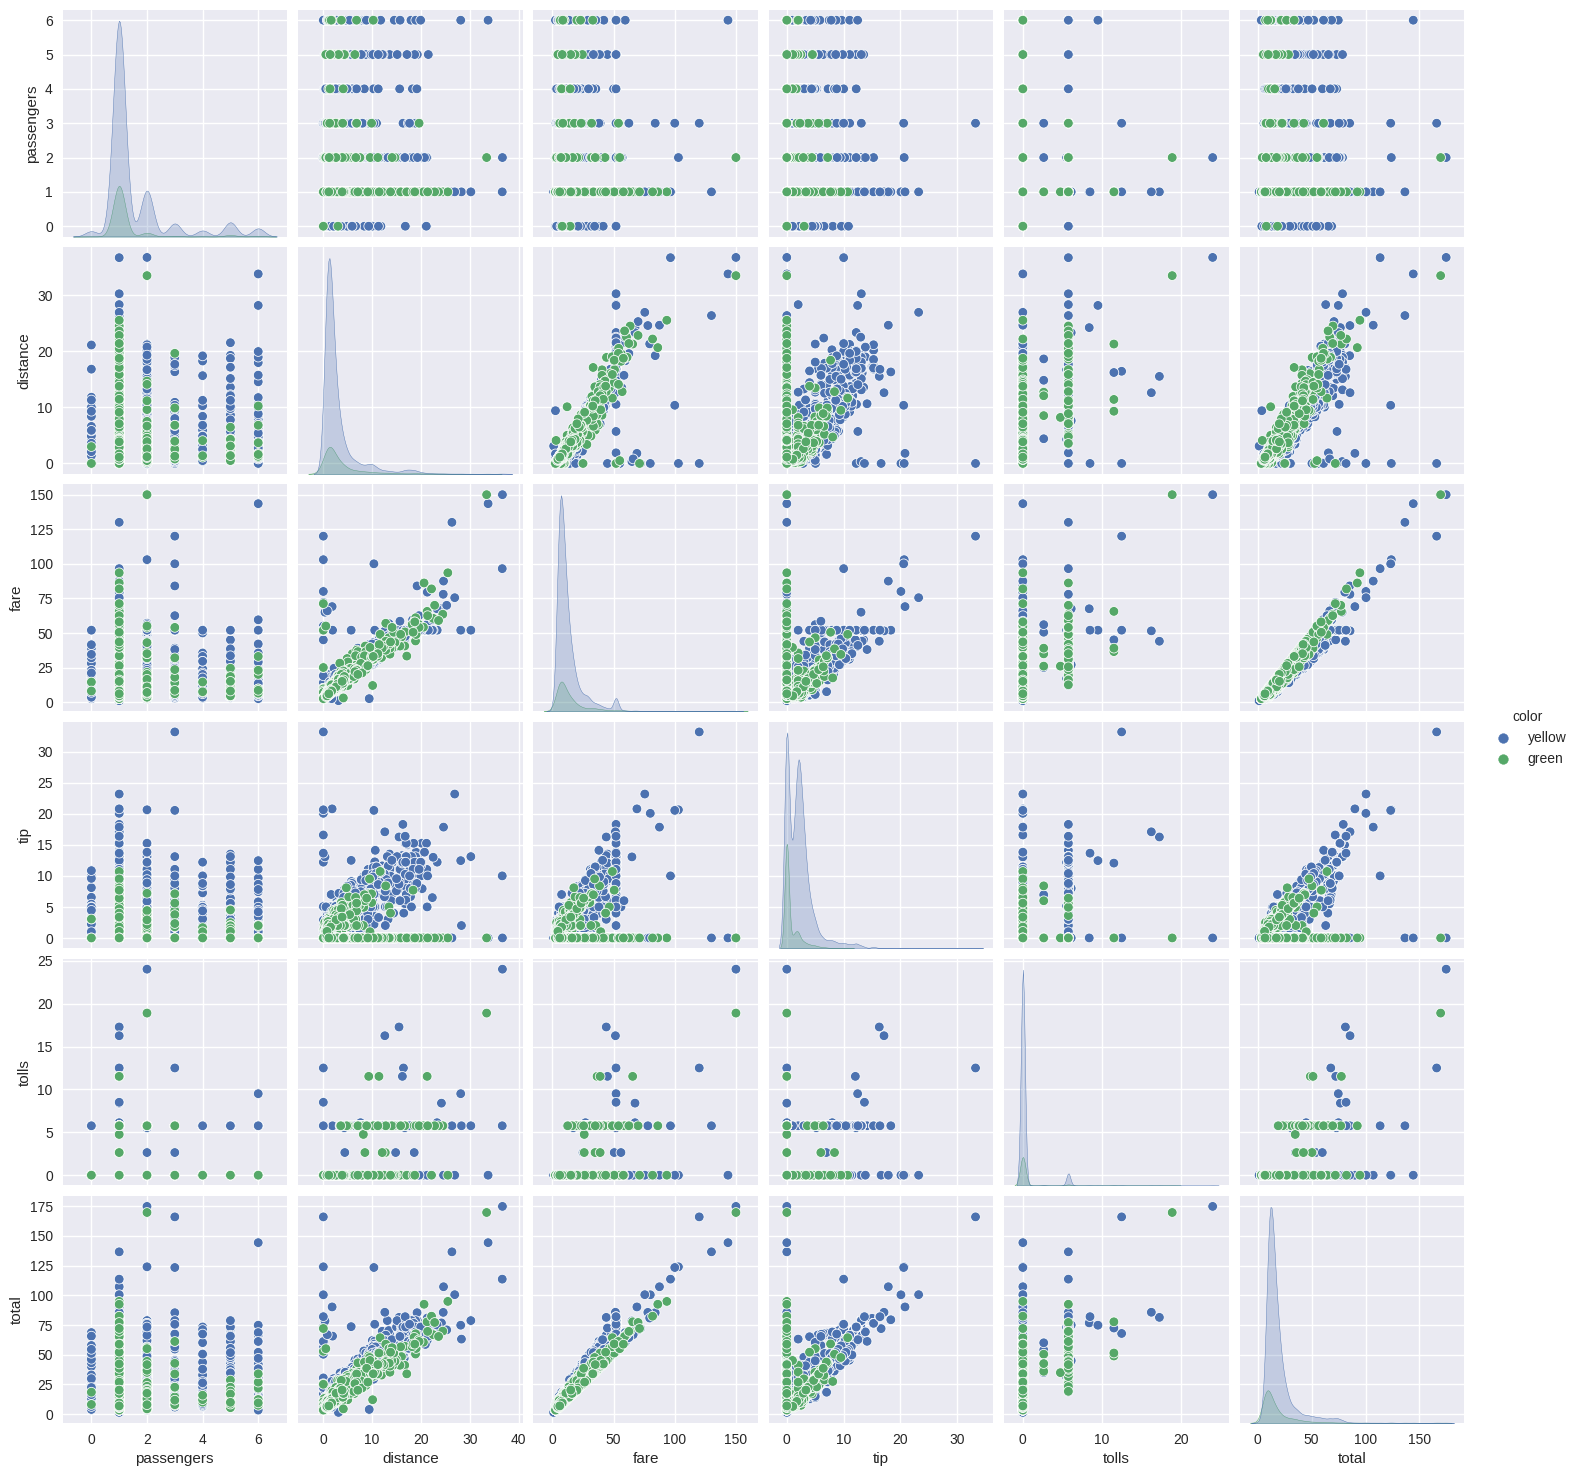

In [59]:
pp = sns.pairplot(taxis, hue="color")

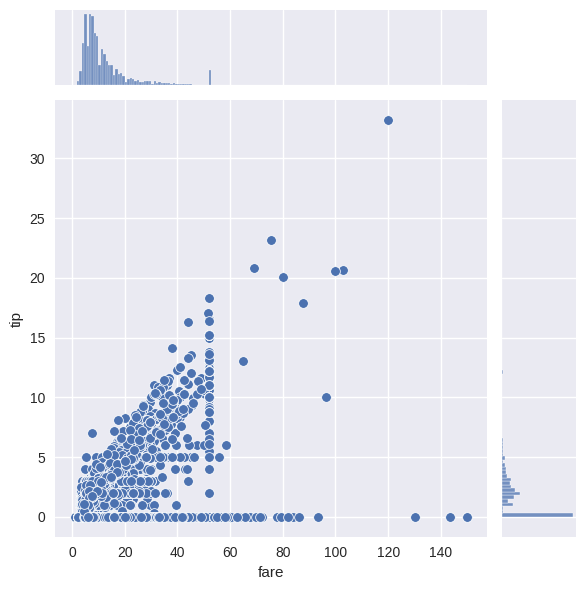

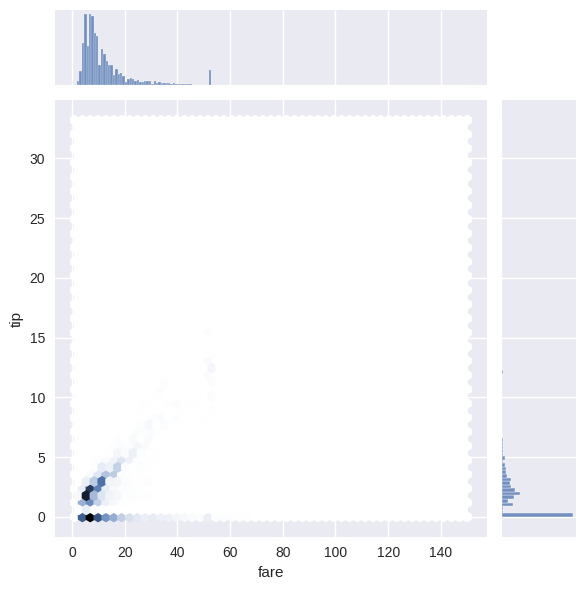

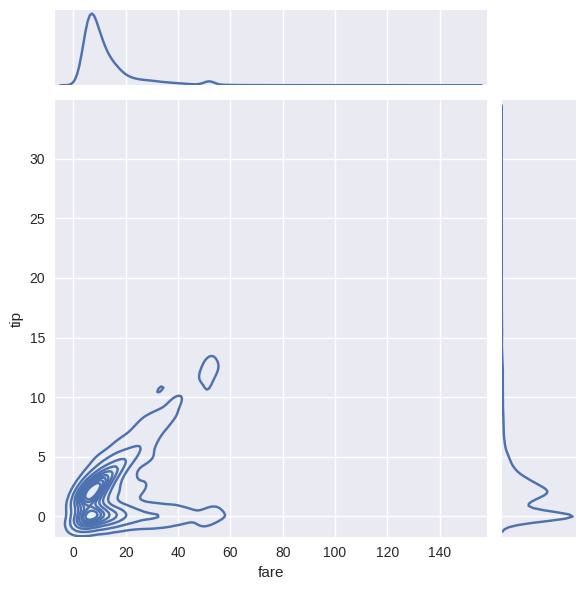

In [60]:
jp = sns.jointplot(x="fare", y="tip", data=taxis)
jp = sns.jointplot(x="fare", y="tip", data=taxis, kind="hex")
jp = sns.jointplot(x="fare", y="tip", data=taxis, kind="kde")

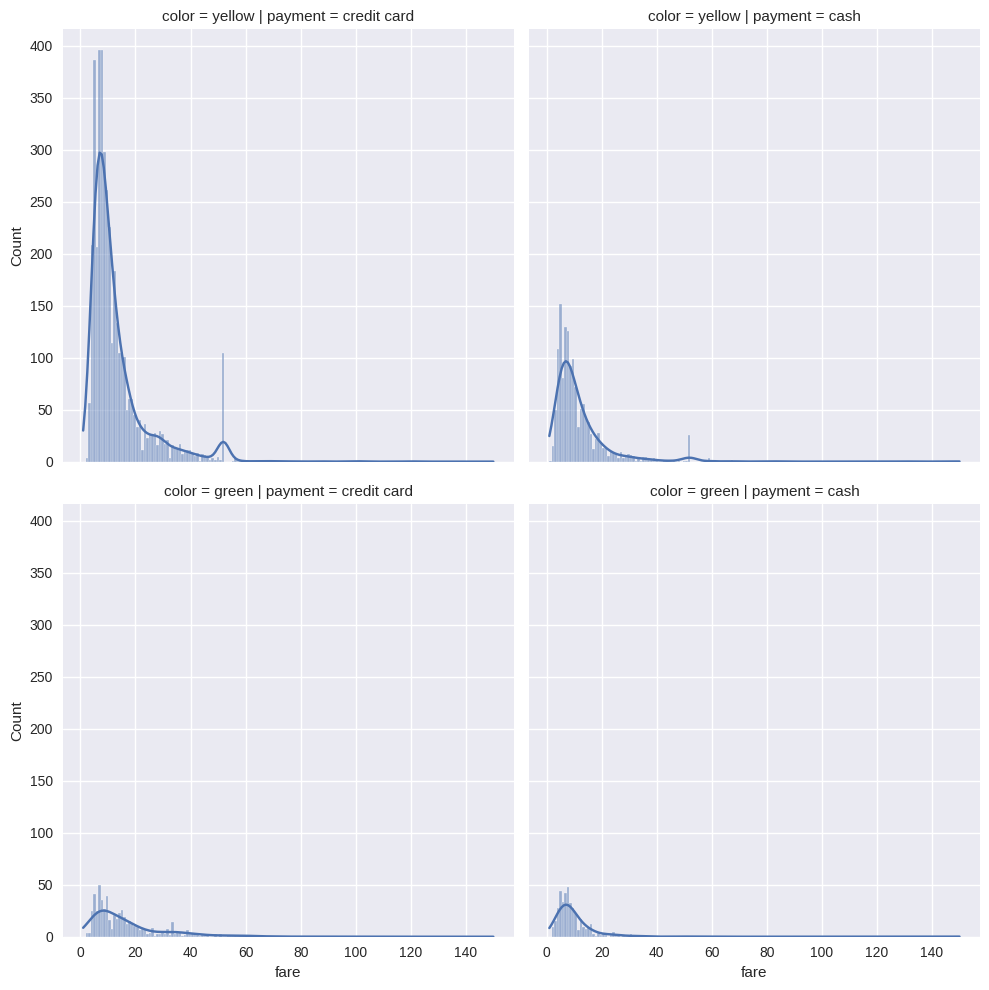

In [61]:
dp = sns.displot(data=taxis, x="fare",
                 row="color", col="payment", kde=True, 
                 rug=False)

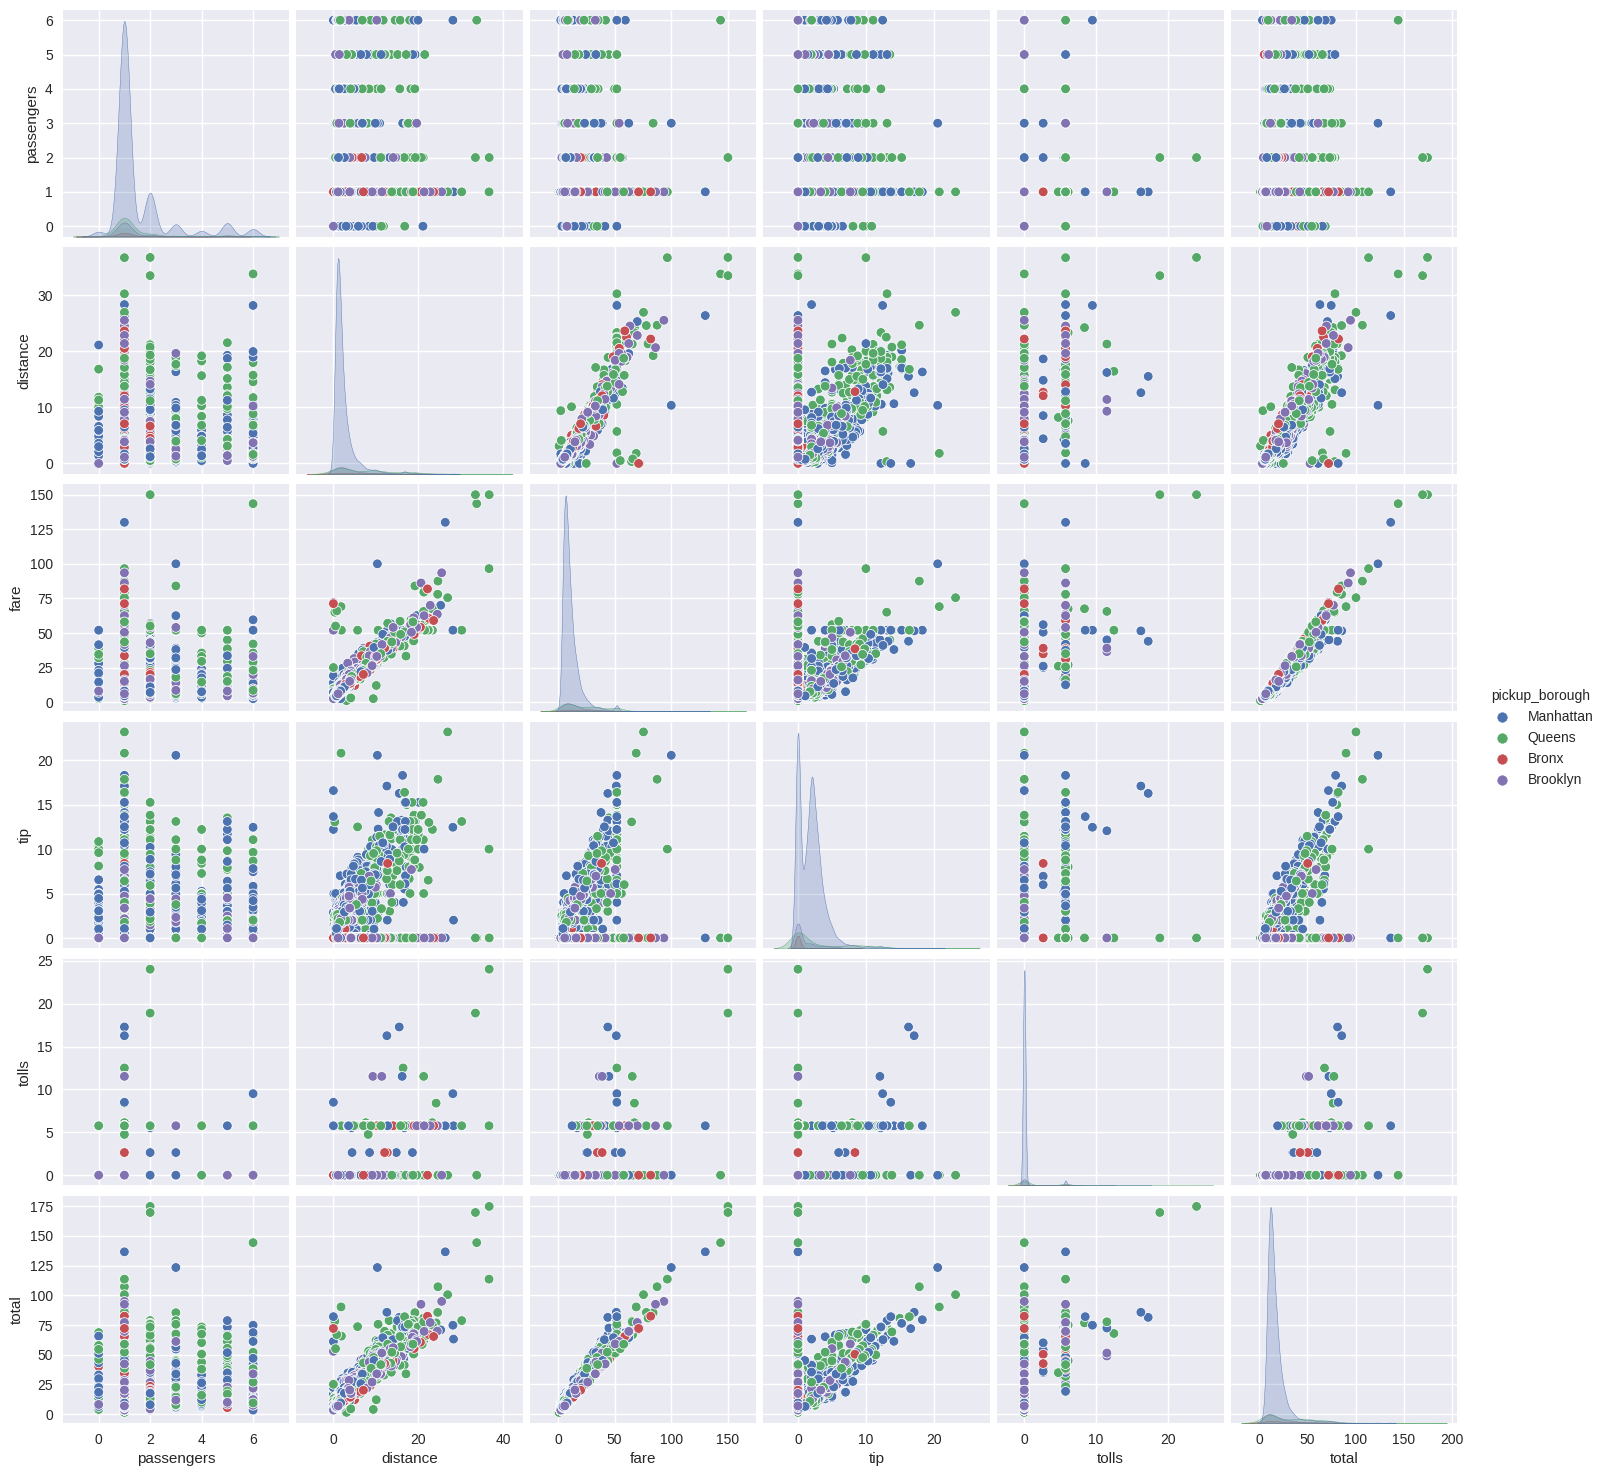

In [62]:
sns.pairplot(taxis,hue="pickup_borough")

In [63]:
plt.style.use('seaborn')
#This loads the tips.csv file which is available by default in seaborn package
tips = sns.load_dataset("tips")
tips.head() #The output is similar to the pandas dataframe - first 5 rows


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


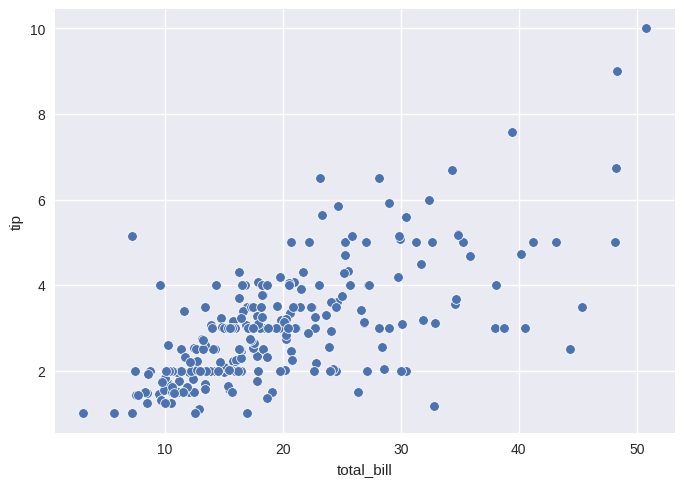

In [64]:
# we want to plot the scatter plot
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

<AxesSubplot: xlabel='size', ylabel='tip'>

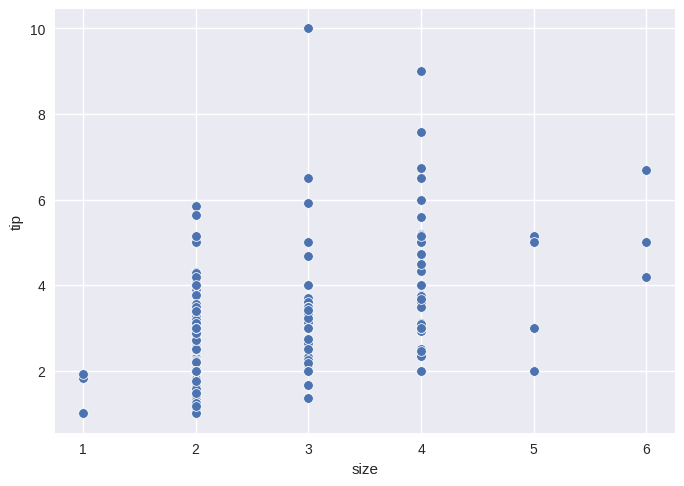

In [65]:
sns.scatterplot(x="size", y="tip", data=tips)

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

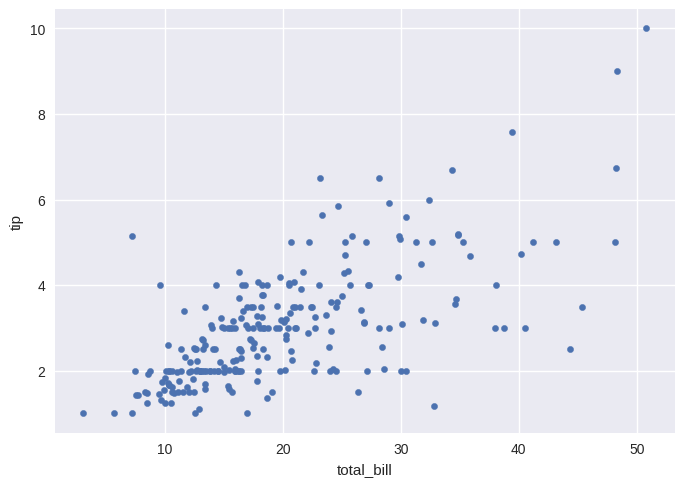

In [66]:
#This is another way to plot the scatter plot of any data
tips.plot.scatter(x='total_bill', y='tip')

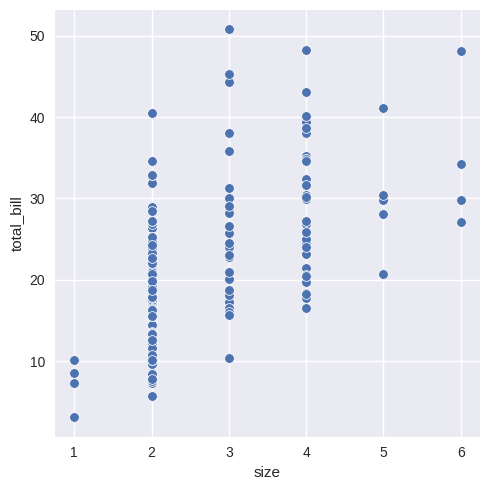

In [67]:
## Let's check the use of function called relplot() in seaborn
fg = sns.relplot(x="size", y="total_bill", data=tips, kind="scatter")

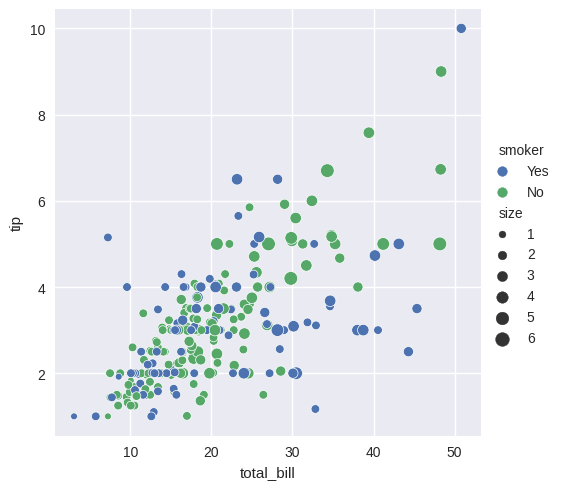

In [68]:
#let's split the data into smoker category
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="smoker", size="size",
            )
## Q: can you create nested dictionary here? - keys are: smoker and size; values: total_bill

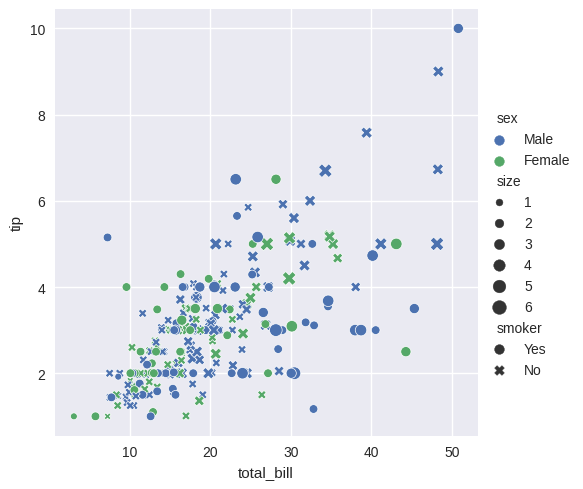

In [69]:
# Here we added one more category (3 categories)
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size",  
            style='smoker',
            )

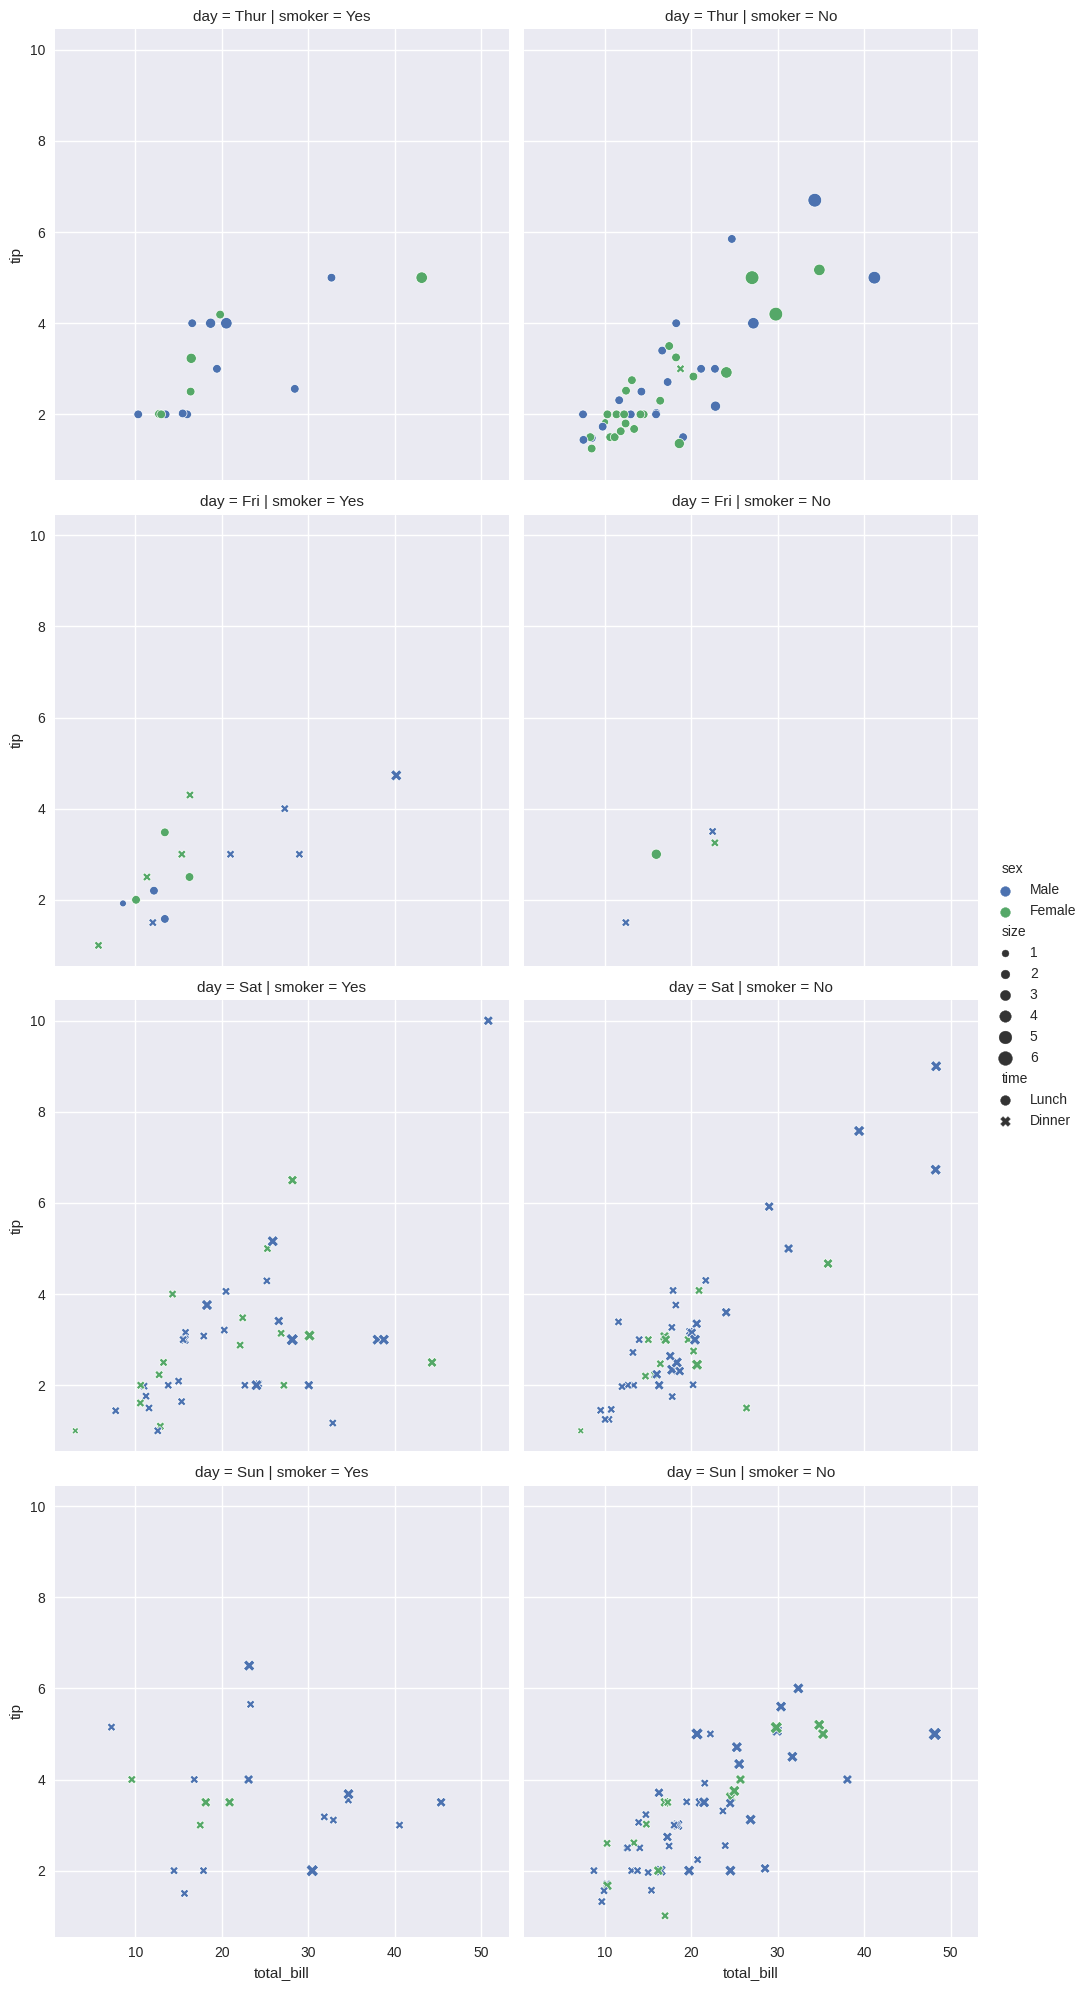

In [70]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter",
            hue="sex", size="size", 
            col='smoker', row='day', style='time',
            row_order=["Thur", "Fri", "Sat", 'Sun']
            )

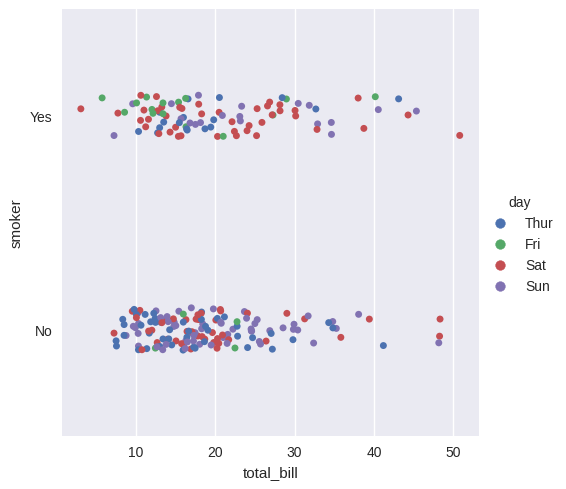

In [71]:
sns.catplot(y="smoker", x="total_bill", data=tips, kind="strip",
            hue="day", orient='h')

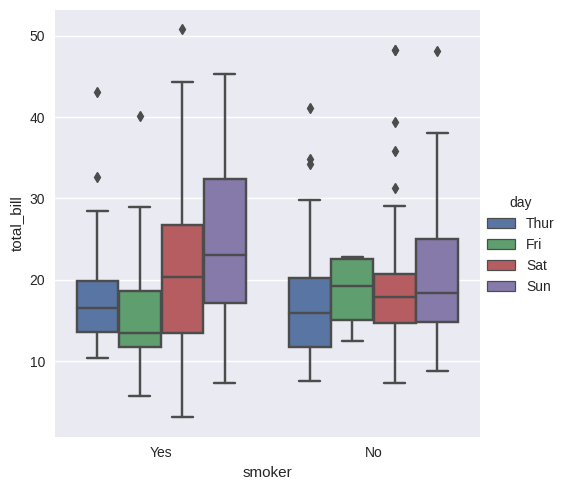

In [72]:
sns.catplot(x="smoker", y="total_bill", data=tips, kind="box",
            hue="day")
#nested groups: Smoker Y/N and Days
# Read up the information on box plots - median, IQR, Q1, Q2, Q3, Q4

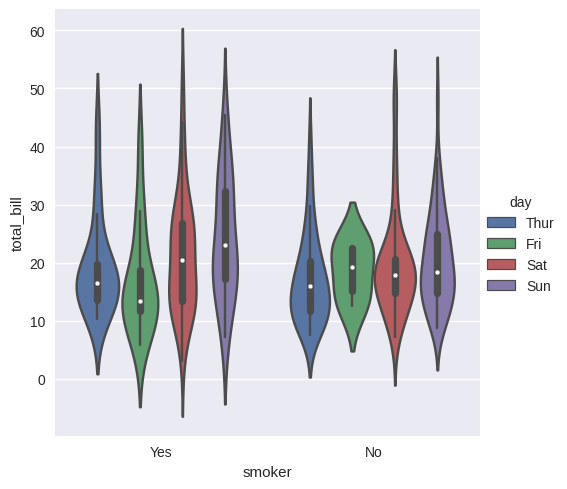

In [73]:
sns.catplot(x="smoker", y="total_bill", data=tips, kind="violin",
            hue="day")

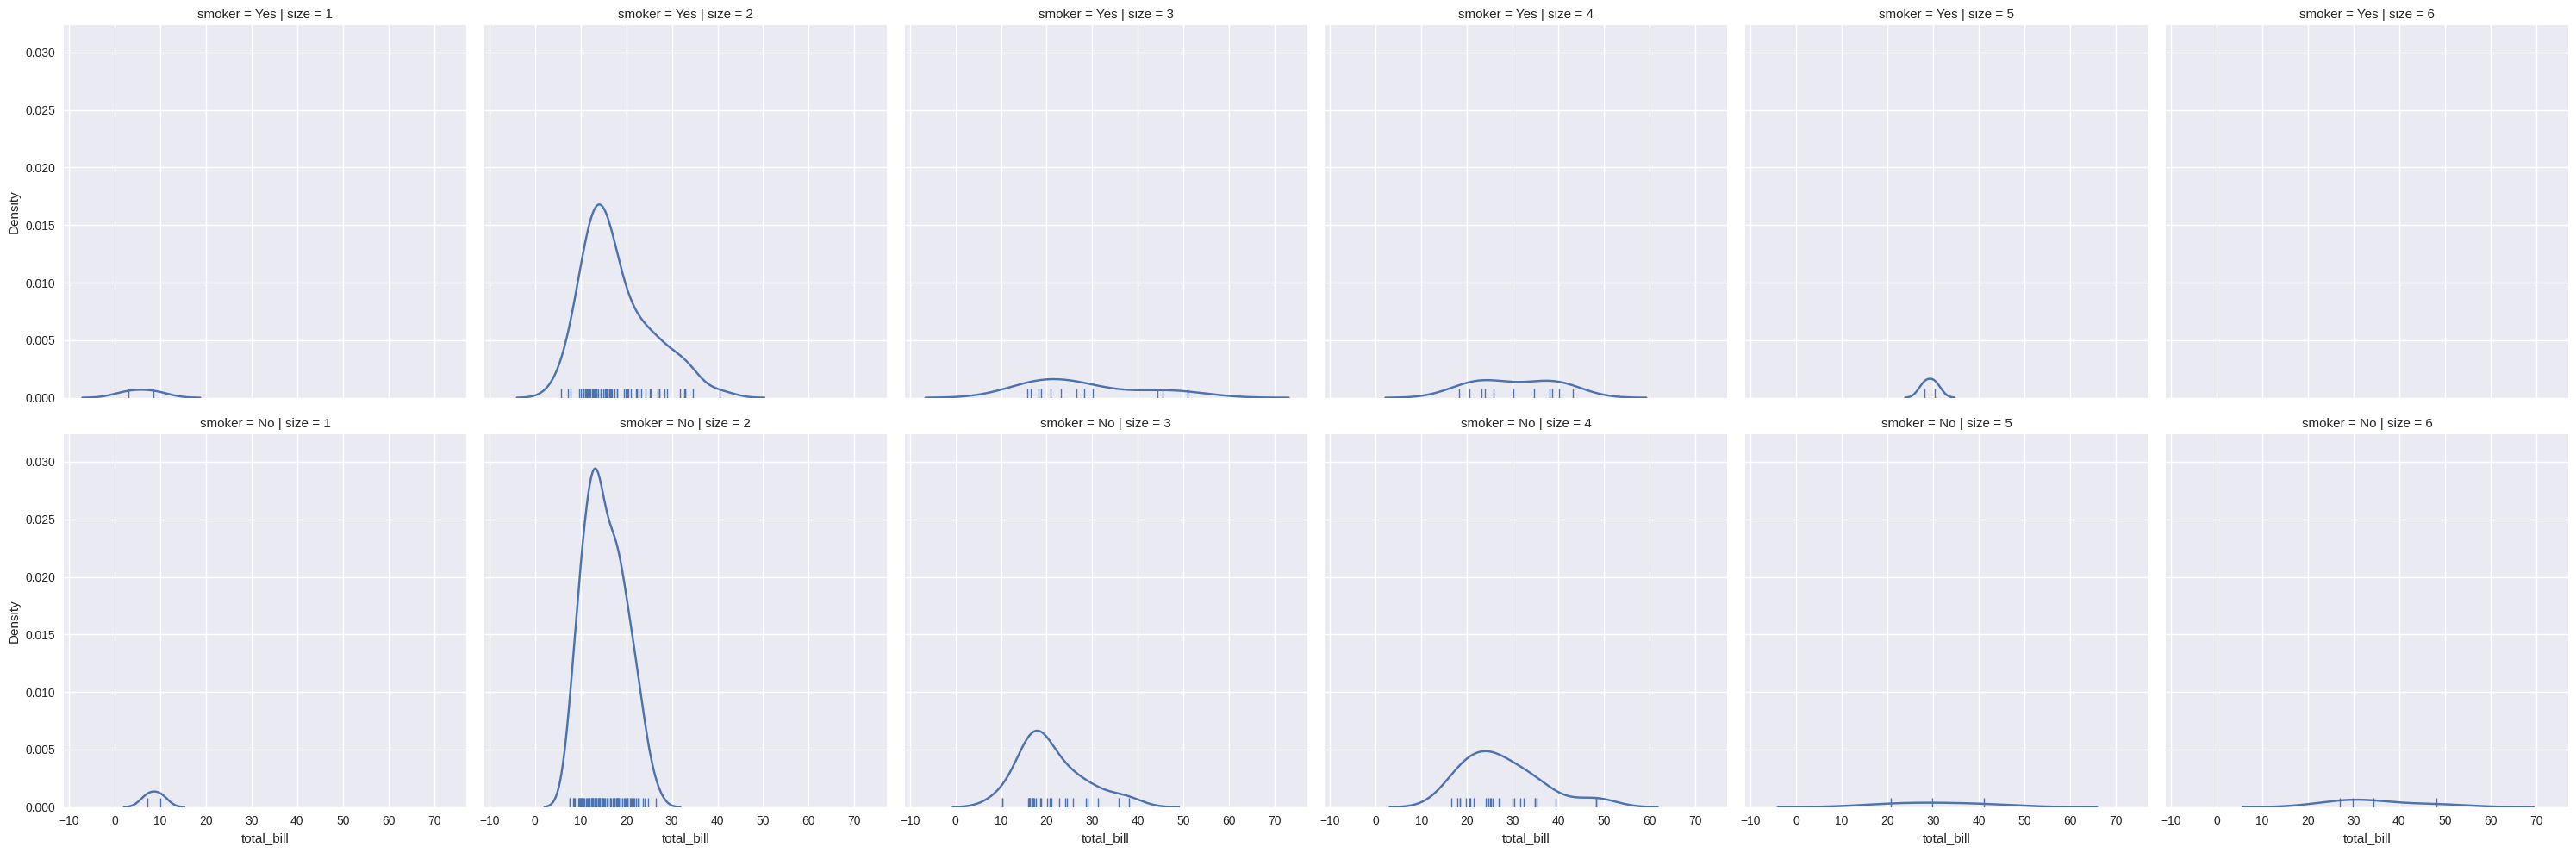

In [74]:
# displot and KDE
# KDE: Kernel Density Estimation - technique to smooth the data/distribution
dp = sns.displot(data=tips, x="total_bill",
                 row="smoker", col="size", kind="kde", 
                 rug=True)

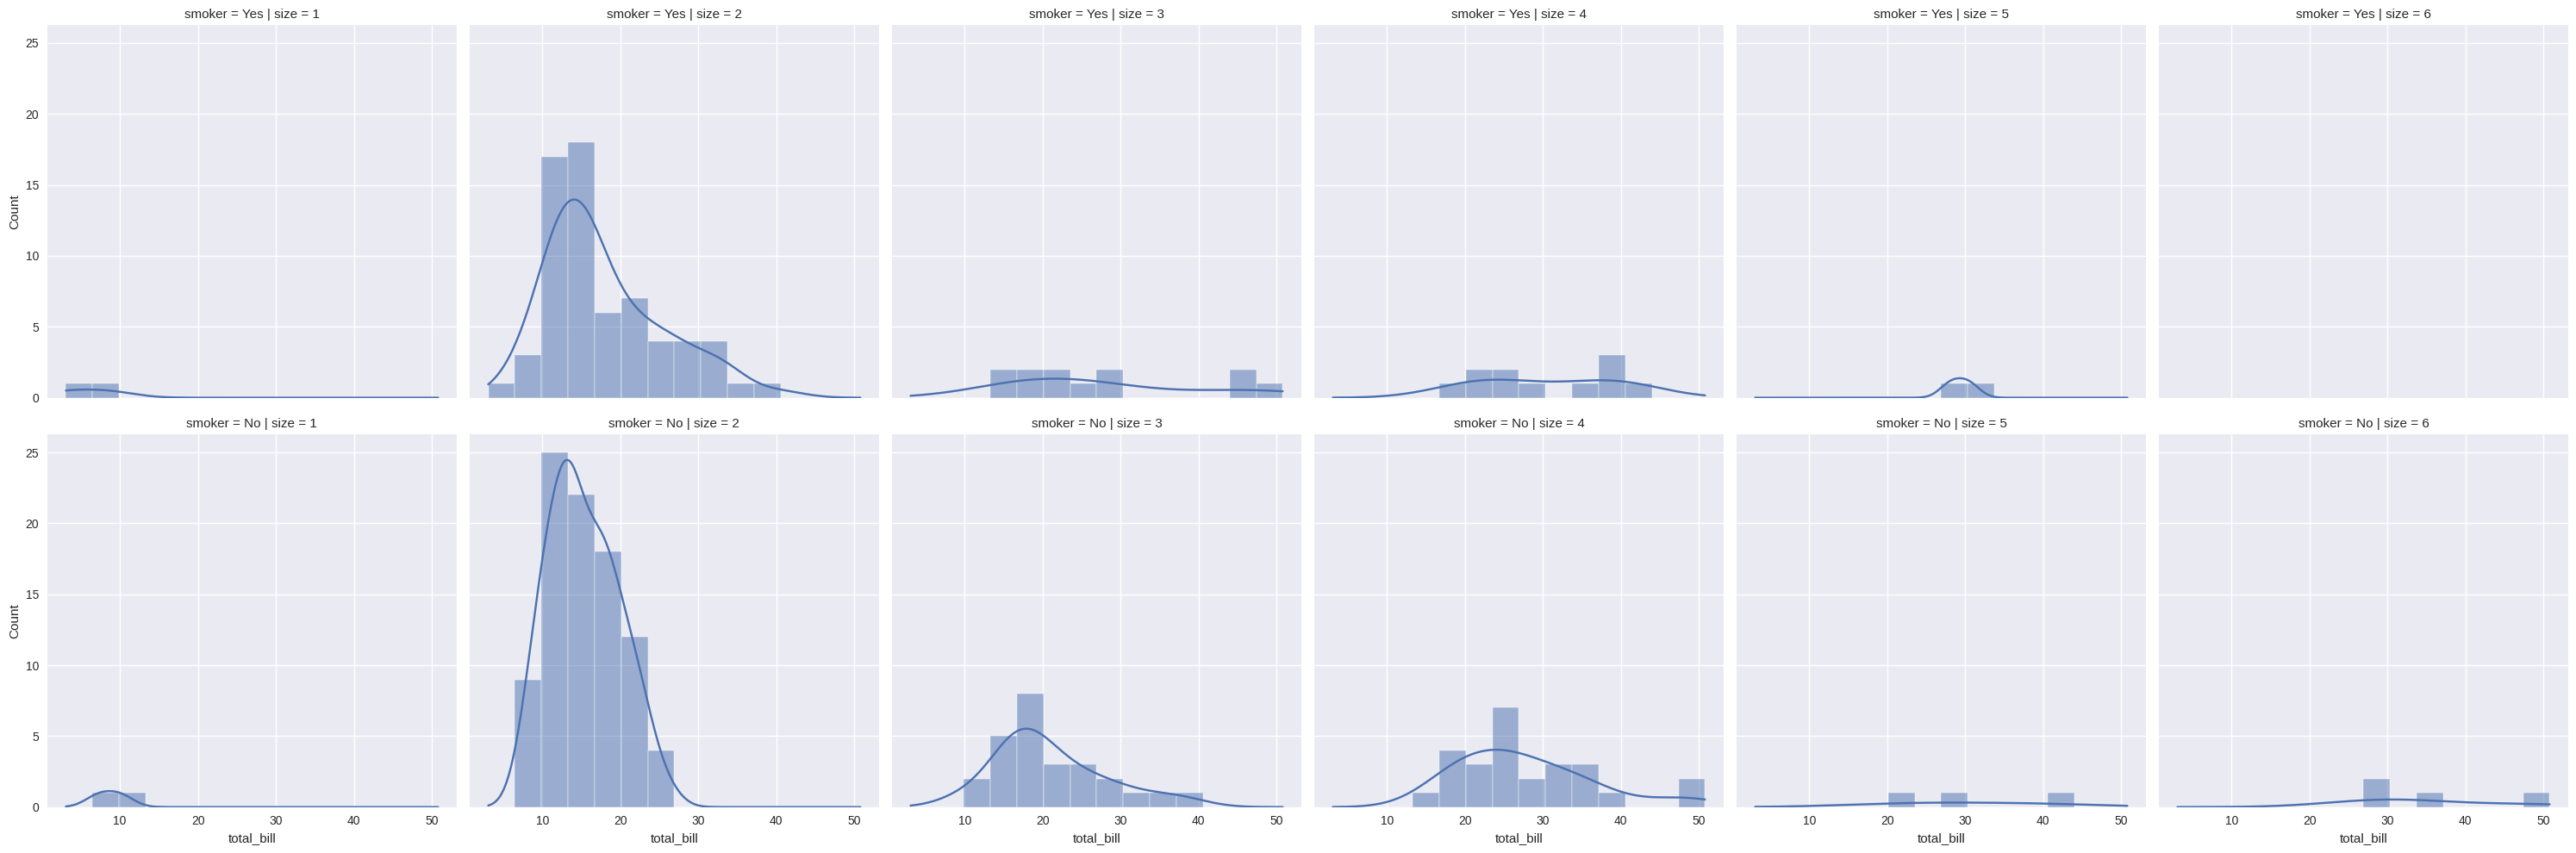

In [75]:
dp = sns.displot(data=tips, x="total_bill",row="smoker", col="size", kde=True, rug=False)

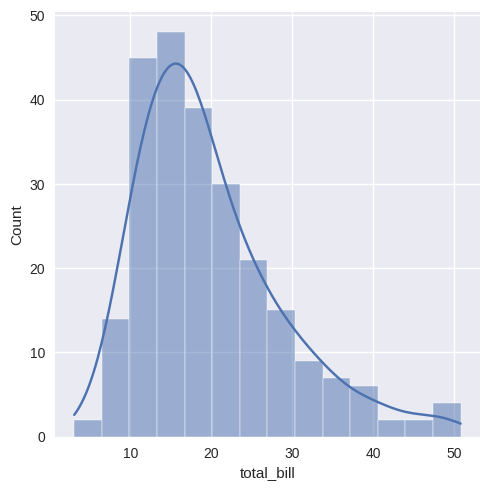

In [76]:
dp = sns.displot(data=tips, x="total_bill", kde=True, rug=False)
#you can see this is not a normal distribution. You can take the log of the total_bill and then
# plot the histogram along with the KDE plot. See if that histogram is normally distributed or not

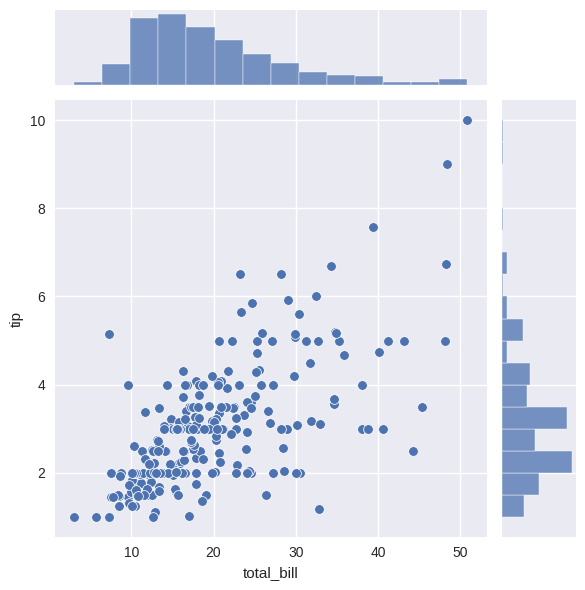

In [77]:
#use of jointplot functionin sns
jp = sns.jointplot(x="total_bill", y="tip", data=tips)

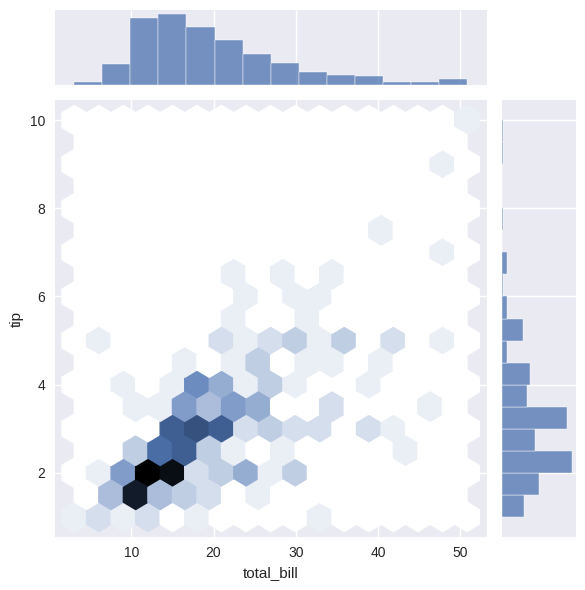

In [78]:
#Heatmap plots - hexbin plot
#Heatmap procedure: For the scatter plot create hexagonal bins and count the number of data points in each bin
# higher the number of points in a bin, darker is the color shading. It is essentially acting as a 2-D histogram
jp = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")


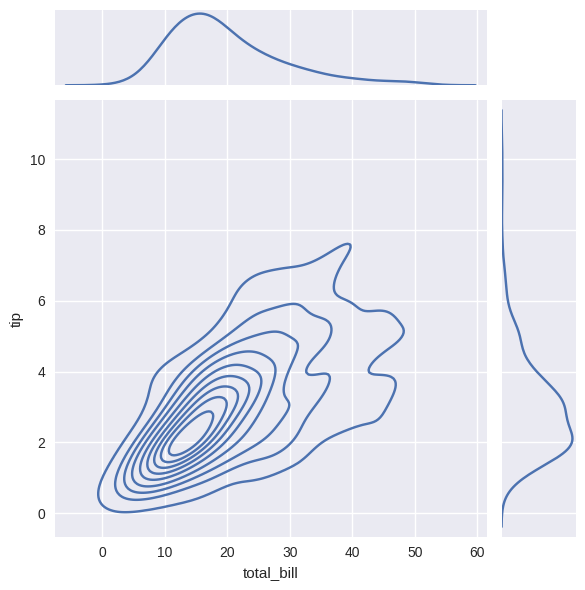

In [79]:
#apply Kernel Density Estimate to the joint data creating contours instead of just scattered points.
jp = sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")

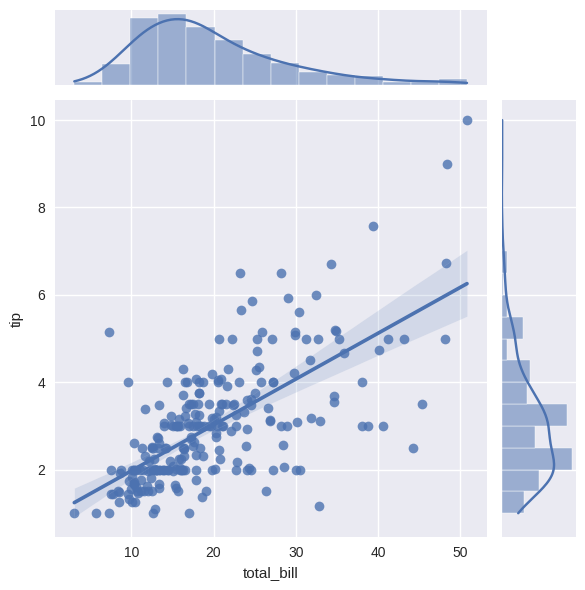

In [80]:
jp = sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")
# The shaded part for the linear fit to the data is 95% CI

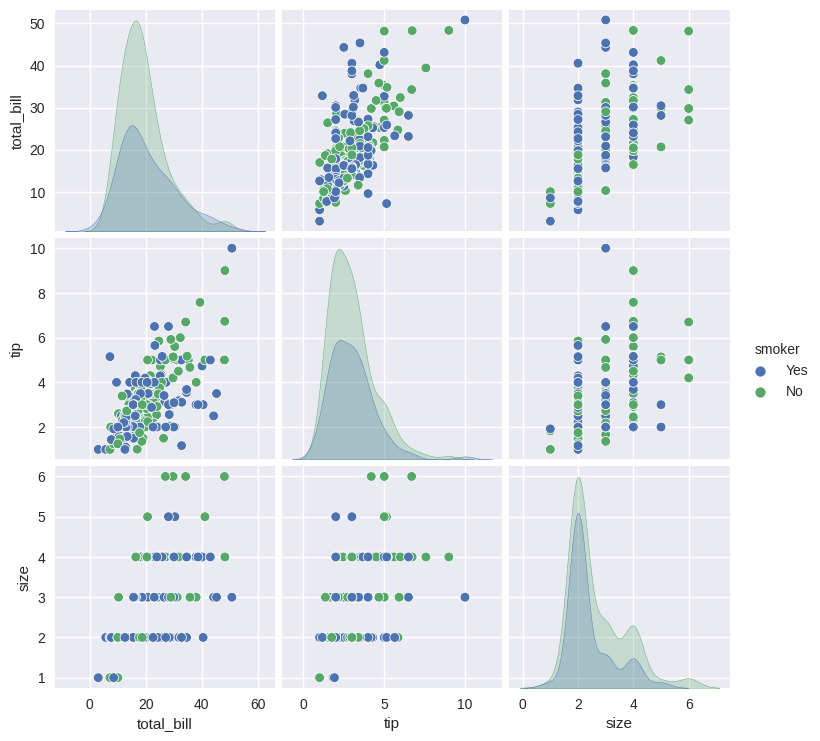

In [81]:
pp = sns.pairplot(tips, hue="smoker")
# From the distirbutions it is apparent that they are possibly not normally distributed. You have to be very cautious if you 
#want to apply any linear regression models.

In [82]:
import sklearn
from sklearn.linear_model import LinearRegression

In [83]:
def regression(x, y, **kwargs):
    ax = plt.gca()
    lm = LinearRegression()
    lm.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    
    ax.scatter(x, y, c=[kwargs['color']])
    ax.plot(x, lm.predict(x.values.reshape(-1, 1)), c=kwargs['color'])

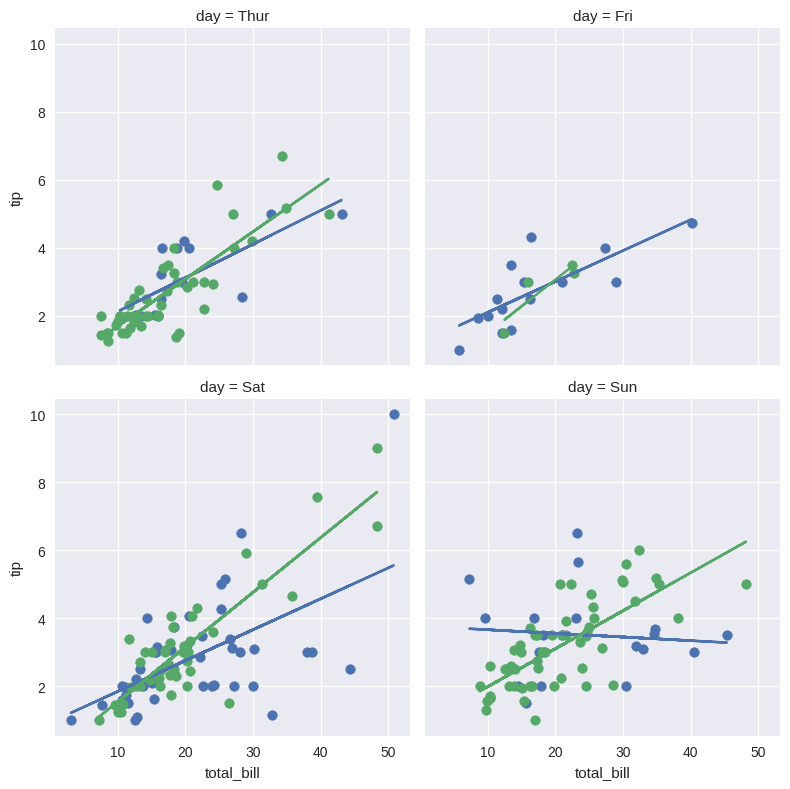

In [84]:
fg = sns.FacetGrid(tips, col="day", hue='smoker', height=4, col_wrap=2)
fg.map(regression, "total_bill", "tip")
# from the regression trends observed you have to learn a bit on fixed effects regressions:
# basically taking dummy variables for the days and smoker category
#Example: dummy_smoker = 1 if yes and 0 if No
# dummy_Fri = 1 if day is Friday and 0 if No. Similarly 3 more dummies in the days.

In [85]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

import numpy as np
import pandas as pd
import watermark, seaborn

[17, 18, 20, 22, 24]


Text(0.5, 1.0, 'This is a demonstration plot for Pie-charts')

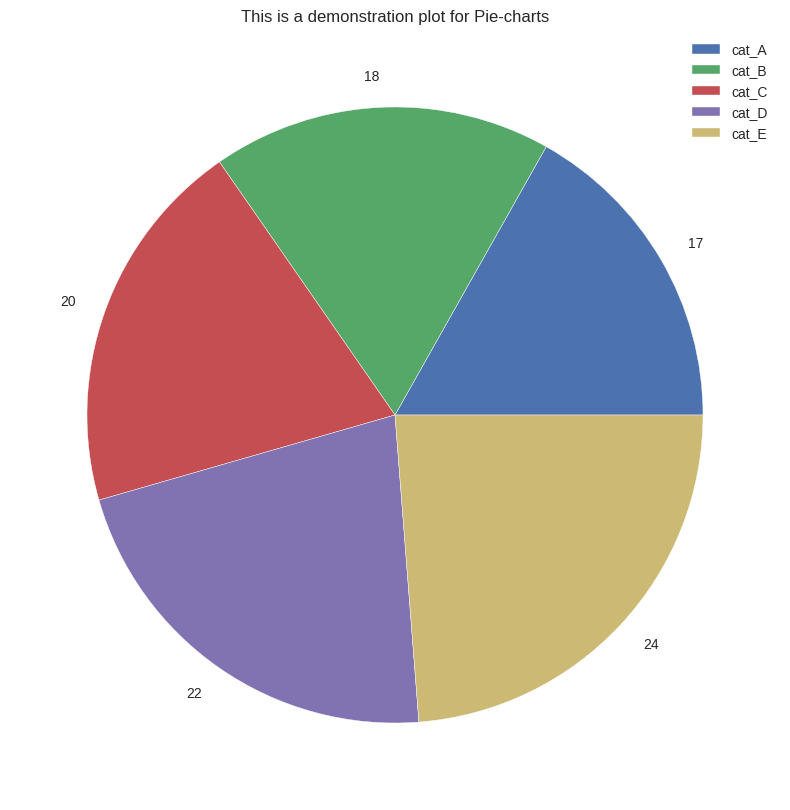

In [86]:
# Let's draw some figures with Pie-charts
data_pie = [17, 18, 20, 22, 24] ## this is for demonstration purpose for pie-charts
print(data_pie)

fig = plt.figure(figsize=(12, 10))
ax = plt.gca() # get current axis (gca)
ax.pie(data_pie, labels = data_pie)
ax.legend(["cat_A","cat_B","cat_C","cat_D", "cat_E"])
ax.set_title("This is a demonstration plot for Pie-charts")

## for real data from any files you can create dictionaries for the Pie-charts
## The data would be dictionary.values() and the labels would be dictionary.keys()

dict_values([17, 18, 20, 22, 24])


Text(0.5, 1.0, 'This is a demonstration plot for Pie-charts')

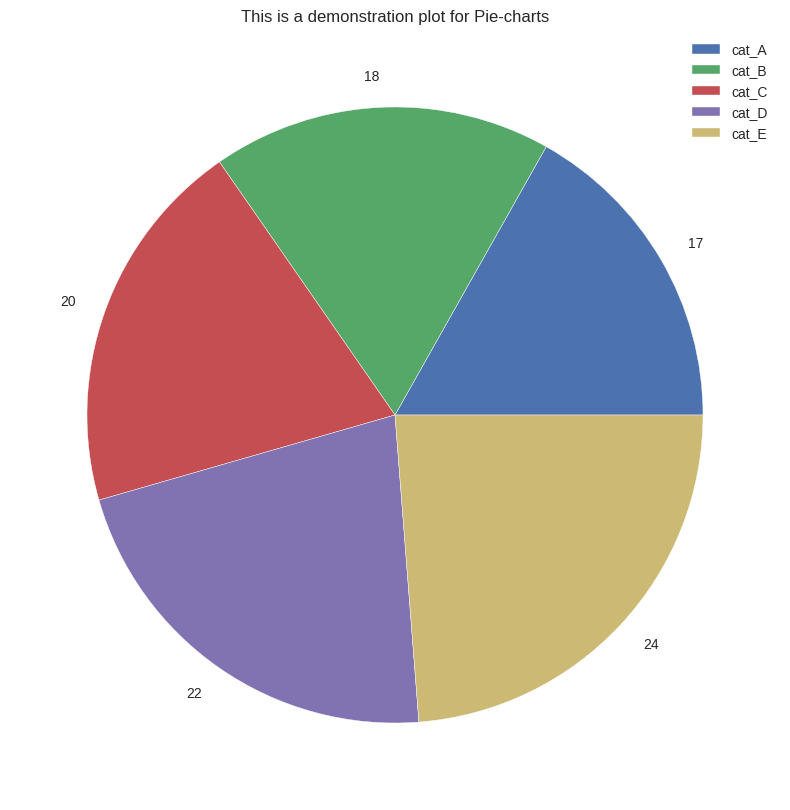

In [87]:
# Let's draw some figures with Pie-charts
data_pie = [17, 18, 20, 22, 24] ## this is for demonstration purpose for pie-charts
legend_pie = ["cat_A","cat_B","cat_C","cat_D", "cat_E"]

dict_pie = dict(zip(legend_pie,data_pie))

print(dict_pie.values())

fig = plt.figure(figsize=(12, 10))
ax = plt.gca() # get current axis (gca)
ax.pie(data_pie, labels = data_pie)
ax.legend(dict_pie.keys())
ax.set_title("This is a demonstration plot for Pie-charts")

## for real data from any files you can create dictionaries for the Pie-charts
## The data would be dictionary.values() and the labels would be dictionary.keys()

In [88]:
from collections import Counter
time_list_tip = tips['time'].tolist()
print(Counter(time_list_tip))
data_pie_time_tips = list(Counter(time_list_tip).values())
print(data_pie_time_tips)

Counter({'Dinner': 176, 'Lunch': 68})
[176, 68]


In [99]:
# Let's draw some figures with Pie-charts
print(time_list_tip[0].values())

fig = plt.figure(figsize=(12, 10))
ax = plt.gca() # get current axis (gca)
ax.pie(data_pie, labels = data_pie)
ax.legend(time_list_tip[0].keys())
ax.set_title("This is a demonstration plot for Pie-charts")

## for real data from any files you can create dictionaries for the Pie-charts
## The data would be dictionary.values() and the labels would be dictionary.keys()

AttributeError: 'str' object has no attribute 'values'